45


LinregressResult(slope=-5113.1825159099935, intercept=13.619766730276842, rvalue=-0.991409416524698, pvalue=1.2580544313632149e-39, stderr=102.87163376680358)

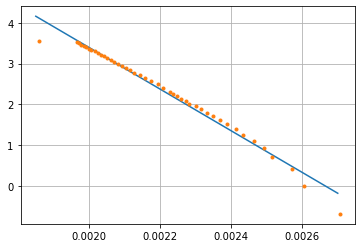

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import scipy.stats as sci


p1 = np.loadtxt("Messwerte1.txt", float, usecols=0)
R1 = np.loadtxt("Messwerte1.txt", float, usecols=1)
p2 = np.loadtxt("Messwerte1.txt", float, usecols=2)
R2 = np.loadtxt("Messwerte1.txt", float, usecols=3)

## Berechnung der Temperatur


A = 3.9083e-3 
B = -5.775e-7 
R0 = 1000
Lambda = 40642
fT = 0.3
fP = 0.5
r = 8.315


t = -A/(2*B)-np.sqrt((R1-R0)/(B*R0)+A**2/(4*B**2)) +273.15

T = t[1:]

##Druck bei Erwärmung in Pa
P1 = p1[1:]*1013*100
P0 = 1013*100

p1r = np.log(P1/P0)

Trez = 1/T

print(len(T))

slp = -5113.1825159099935
intc = 13.619766730276842

x = np.arange(0.00185,0.0027,0.000001)

plt.plot(x,slp*x+intc)
plt.plot(Trez,p1r,'.')

plt.grid()

sci.linregress(Trez,p1r)

46


LinregressResult(slope=-4976.096918786265, intercept=13.194414434500628, rvalue=-0.9997393403483202, pvalue=7.126775362289297e-74, stderr=17.131654629777)

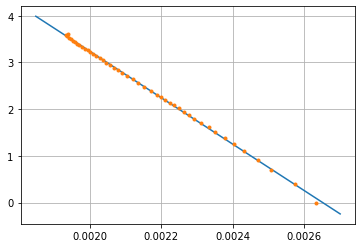

In [3]:


t = -A/(2*B)-np.sqrt((R2-R0)/(B*R0)+A**2/(4*B**2)) +273.15

T = t

##Druck bei Erwärmung in Pa
P2 = p2*1013*100
P0 = 1013*100

p2r = np.log(P2/P0)

Trez2 = 1/T

print(len(T))

slp = -4976.096918786265
intc = 13.194414434500628

x = np.arange(0.00185,0.0027,0.000001)

plt.plot(x,slp*x+intc)
plt.plot(Trez2,p2r,'.')

plt.grid()

sci.linregress(Trez2,p2r)

In [4]:
##Steigungen 

m1 = -5110
sig1 = 110

m2 = -4999
sig2 = 18

m = (m1/sig1**2 + m2/sig2**2)/(1/sig1**2+1/sig2**2)
sigm = np.sqrt(1/(1/sig1**2+1/sig2**2))

sigmneu = 18

print(m, sigm)
K = 8.314462618

a = -5102

sigA = sigmneu*K

A = -a*K
print(A,sigA)

-5001.8947198969745 17.76374249215949
42420.388277036 149.660327124


45
[-3945.7832064     11.20197535] [[43.78968772         nan]
 [        nan  0.08880434]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in sqrt


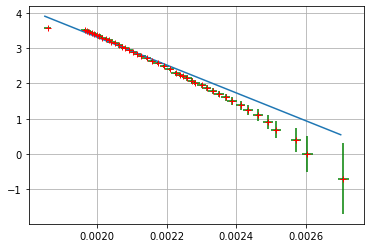

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import scipy.stats as sci
import scipy.optimize


p1 = np.loadtxt("Messwerte1.txt", float, usecols=0)
R1 = np.loadtxt("Messwerte1.txt", float, usecols=1)
p2 = np.loadtxt("Messwerte1.txt", float, usecols=2)
R2 = np.loadtxt("Messwerte1.txt", float, usecols=3)

## Berechnung der Temperatur


A = 3.9083e-3 
B = -5.775e-7 
R0 = 1000
Lambda = 40642
r = 8.315


t = -A/(2*B)-np.sqrt((R1-R0)/(B*R0)+A**2/(4*B**2)) +273.15

T = t[1:]

##Druck bei Erwärmung in Pa
P1 = p1[1:]*1013*100
P0 = 1013*100

p1r = np.log(P1/P0)

Trez = 1/T

print(len(T))





##systematische Fehler
sigp = 0.5*1013*100  ##Druck
sigt = 0.3 +0.005*T  ##Temperatur

##stat Fehler
sigt = sigt*1/T**2
sigp = sigp/P1


def testfunc (x,M,C):
    return M*x+C

popt, pcov = scipy.optimize.curve_fit(testfunc, Trez, p1r,sigma=sigp, p0=[0,0], absolute_sigma=True)

print(popt,np.sqrt(pcov))


x = np.arange(0.00185,0.0027,0.000001)


plt.errorbar(Trez, p1r, xerr=sigt, yerr=sigp, fmt='+', ecolor='g', color='r')

plt.grid()

plt.plot(x,-3945.7832064*x+11.20197535)